# Important Installation

In [ ]:
pip install pygooglechart

In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.3


In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 94 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygooglechart import PieChart3D

%matplotlib inline

# Importing Sales Data Set

In [ ]:
sales_data = pd.read_csv('/salesdata.csv')
sales_data.head(5)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


# 1- Compare Sales By region for 2016 and 2015 using bar chart

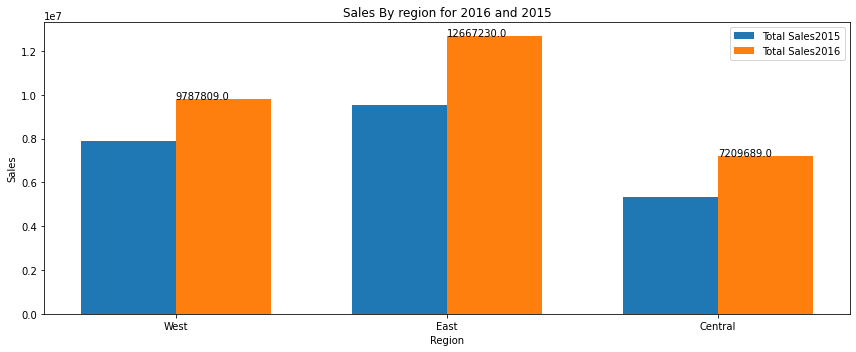

In [ ]:
s2015 = sales_data.groupby(['Region'])['Sales2015'].sum()
s2016 = sales_data.groupby(['Region'])['Sales2016'].sum()

df3 = pd.DataFrame({'Sales2015': [7.891729e+06, 9.512916e+06,5.349745e+06],
                   'Sales2016': [9.787809e+06, 1.266723e+07,7.209689e+06]})
df3.to_csv(index=False)
region=['Central','East','West']
df3['Region']=region

labels = sales_data['Region'].unique()
s1 =df3['Sales2015']
s2 = df3['Sales2016']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, s1, width, label='Total Sales2015')
rects2 = ax.bar(x + width/2, s2, width, label='Total Sales2016')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(s1, s2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_xlabel('Region')
ax.set_title('Sales By region for 2016 and 2015')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_prop_cycle(color=['red', 'green', 'blue'])
fig.tight_layout()
plt.show()

# 2- Pie chart for sales for each Region in 2016


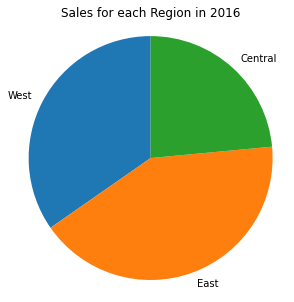

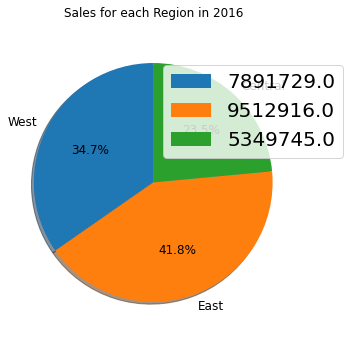

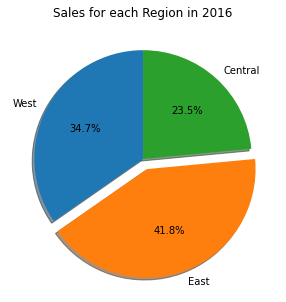

In [ ]:

sorted_counts = df3['Sales2015']
new_index= sales_data['Region'].unique()

fig1, ax1 = plt.subplots(figsize=(5,5))
plt.pie(sorted_counts, labels = new_index, startangle = 90, counterclock = True);
plt.title('Sales for each Region in 2016')
plt.axis('square')
plt.show()



fig2, ax1 = plt.subplots(figsize=(5,5))
pie = ax1.pie(df3['Sales2015'],labels=new_index,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 12})
ax1.axis('equal')
ax1.set(title="Sales for each Region in 2016")
ax1.set_axis_off()
ax1.legend(pie[0], df3['Sales2015'], loc="upper right", fontsize=20, bbox_to_anchor=(1.25, 0.9))
plt.tight_layout()
plt.show()


fig3, ax1 = plt.subplots(figsize=(5,5))
plt.pie(df3['Sales2015'],labels=new_index,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0),
        autopct='%1.1f%%')
plt.title('Sales for each Region in 2016')
plt.show()

# 3- Compare Sales of 2015 and 2016 with Region and Tiers

In [ ]:
a2015 = sales_data.groupby(['Sales2015' ,'Region'])['Tier'].sum()

a2016 = sales_data.groupby(['Tier' ,'Region'])['Sales2016'].sum()

a2015

Sales2015   Region 
-11053.44   Central    High
-7510.00    West       High
-7368.96    West       High
-6293.76    West       High
-5982.38    East       High
                       ... 
 67540.83   East       High
 74176.17   East        Med
 86621.90   East       High
 88427.52   East       High
 145760.12  East       High
Name: Tier, Length: 1294, dtype: object

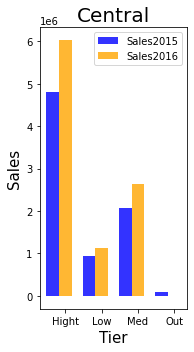

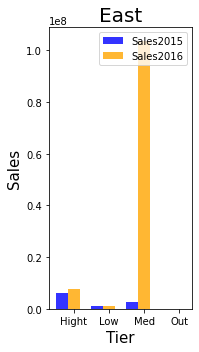

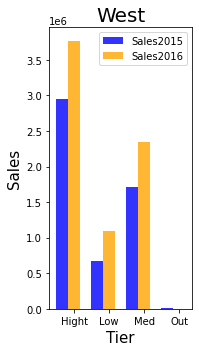

In [ ]:

Central = pd.DataFrame({'Sales2015': [4.798698e+06, 9.434397e+05 ,2.068226e+06 , 8.136489e+04],
                   'Sales2016': [6.026043e+06, 1.132833e+06 ,  2.632181e+06,-3.248530e+03]})

East = pd.DataFrame({'Sales2015': [6.102946e+06, 9.016658e+05 ,2.470998e+06 ,3.730655e+04],
                   'Sales2016': [7.817151e+06, 1.144930e+06 ,103.705150e+06 ,0.000000e+00]})

West= pd.DataFrame({'Sales2015': [2.944789e+06, 6.710644e+05 ,1.718476e+06 ,1.541508e+04],
                   'Sales2016': [3.768038e+06 , 1.099502e+06 ,2.342149e+06 ,0.000000e+00]})

Central.to_csv(index=False)
East.to_csv(index=False)
West.to_csv(index=False)

Tier=['Hight','Low','Med','Out']

Central['Tier']=Tier
East['Tier']=Tier
West['Tier']=Tier

Central.head()
East.head()

plt.figure(figsize = [5, 5])
plt.subplot(1, 2, 1)
n_groups = 4
means_frank = Central['Sales2015']
means_guido = Central['Sales2016']
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Sales2015')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='Orange',
label='Sales2016')
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Tier',fontsize=15)
plt.title('Central',fontsize=20)
plt.xticks(index + bar_width, ('Hight','Low','Med','Out'))
plt.legend()
plt.tight_layout()
plt.show()

#----------------------------------------------------------------------------------
plt.figure(figsize = [5, 5])
plt.subplot(1, 2, 1)
n_groups = 4
means_frnk = East['Sales2015']
means_guid = East['Sales2016']
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_frnk, bar_width,alpha=opacity,color='pink',label='Sales2015')
rects2 = plt.bar(index + bar_width, means_guid, bar_width,alpha=opacity,color='whitesmoke',label='Sales2016')
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Tier',fontsize=15)
plt.title('East',fontsize=20)
plt.xticks(index + bar_width, ('Hight','Low','Med','Out'))
plt.legend()
plt.tight_layout()
plt.show()
#---------------------------------------------------------

plt.figure(figsize = [5, 5])
plt.subplot(1, 2, 2)
n_groups = 4
means_frnk = West['Sales2015']
means_guid = West['Sales2016']
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, means_frnk, bar_width,alpha=opacity,color='pink',label='Sales2015')
rects2 = plt.bar(index + bar_width, means_guid, bar_width,alpha=opacity,color='whitesmoke',label='Sales2016')
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Tier',fontsize=15)
plt.title('West' ,fontsize=20)
plt.xticks(index + bar_width, ('Hight','Low','Med','Out'))
plt.legend()
plt.tight_layout()
plt.show()

# 4- In East region, which state registed a decline in 2016 compared to 2015

44


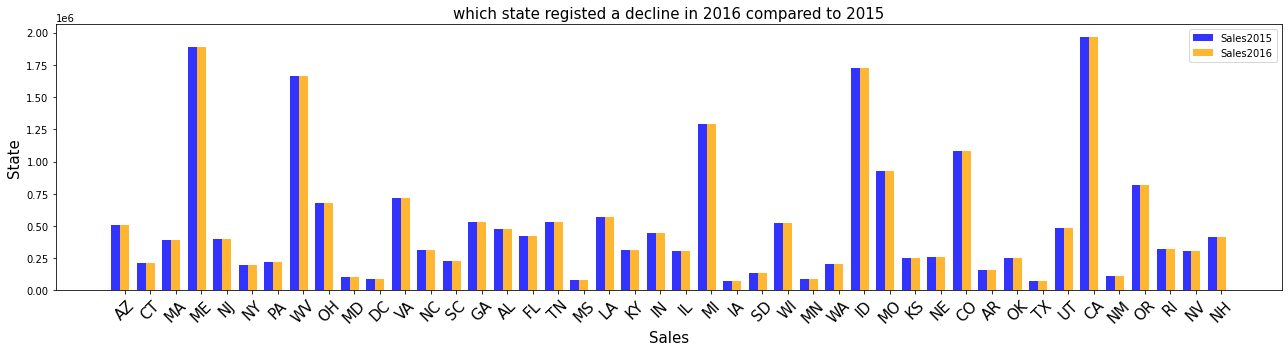

In [ ]:
label = sales_data['State'].unique()
print(len(label)) 

b2015 = sales_data.groupby(['State'])['Sales2015'].sum()

b2016 = sales_data.groupby(['State'])['Sales2015'].sum()

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (18,5)
# data to plot
n_groups = label
means_frank = b2015
means_guido = b2016

# create plot
fig, ax = plt.subplots()
index = np.arange(44)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='pink',label='Sales2015')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='whitesmoke',label='Sales2016')

plt.xlabel('Sales',fontsize=15)
plt.ylabel('State',fontsize=15)
plt.title('which state registed a decline in 2016 compared to 2015',fontsize=15)
plt.xticks(index + bar_width, sales_data['State'].unique(),fontsize=15)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 5- Which Division saw a decline in number of units sold in 2016 compared to 2015

44


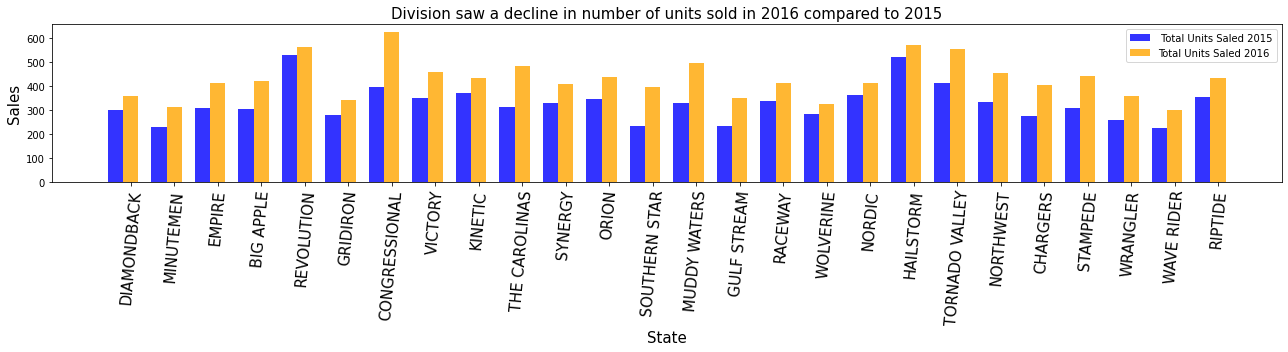

In [ ]:
division = sales_data['Division'].unique()

c2015 = sales_data.groupby(['Division'])['Units2015'].sum()

c2016 = sales_data.groupby(['Division'])['Units2016'].sum()

from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (18,5)
# data to plot
n_groups = 26

# create plot
fig, ax = plt.subplots()
index = np.arange(26)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, c2015, bar_width,alpha=opacity,color='pink',label=' Total Units Saled 2015')

rects2 = plt.bar(index + bar_width, c2016, bar_width,alpha=opacity,color='whitesmoke',label='Total Units Saled 2016')

plt.xlabel('State',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Division saw a decline in number of units sold in 2016 compared to 2015',fontsize=15)
plt.xticks(index + bar_width, sales_data['Division'].unique(),fontsize=15)
plt.xticks(rotation=85)
plt.legend()

plt.tight_layout()
plt.show()

# 6- Create a New Column QTR

In [ ]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [ ]:
sales_data['Month'].replace({'Aug':'  Q3', 'Oct':'Q4', 'Jun':'Q3', 'Mar':'Q1', 'Sep':'Q3', 'Jul':'Q2', 'Feb':'Q1', 'Apr':'Q2', 'Nov':'Q4',
       'May':'Q2', 'Dec':'Q4', 'Jan':'Q1'}, inplace=True)
print(sales_data.head())

   AccountId AccountName  ... TargetAchevied2015 TargetAchevied2016
0       1116    Account1  ...               0.70               1.53
1       1116    Account1  ...               0.84               1.31
2       2391    Account2  ...               1.15               1.29
3       2391    Account2  ...               1.33               1.17
4       2397    Account3  ...               1.02               1.53

[5 rows x 14 columns]


In [ ]:
d2015 = sales_data.groupby(['Month'])['Sales2015'].sum()
d2016 = sales_data.groupby(['Month'])['Sales2016'].sum()


df6= pd.DataFrame({'Sales2015': d2015,
                   'Sales2016': d2016})
df6

,Sales2015,Sales2016
Month,,
Q3,1.839048e+06,2.424531e+06
Q1,5.485800e+06,6.997953e+06
Q2,5.482564e+06,7.121913e+06
Q3,4.233344e+06,5.552463e+06
Q4,5.713634e+06,7.567868e+06


# 7- Compare QTR wise sales in 2015 and 2016 in bare blot

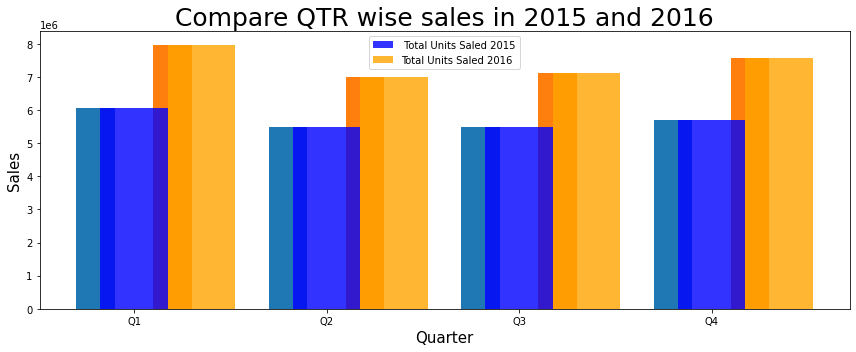

In [ ]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (12,5)

X = ['Q1','Q2','Q3','Q4']
Y = [1.839048e+06 + 4.233344e+06 ,5.485800e+06 ,5.482564e+06 ,5.713634e+06	]
Z = [2.424531e+06 + 5.552463e+06,6.997953e+06 , 7.121913e+06 , 7.567868e+06]
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.2)
plt.bar(_X + 0.2, Z, 0.2)
plt.xticks(_X, X) # set labels manually
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Compare QTR wise sales in 2015 and 2016',fontsize=25)

rects1 = plt.bar(index, Y, bar_width,alpha=opacity,color='pink',label=' Total Units Saled 2015')
rects2 = plt.bar(index + bar_width, Z, bar_width,alpha=opacity,color='whitesmoke',label='Total Units Saled 2016')
plt.xticks()
plt.legend()

plt.tight_layout()
plt.show()


# 8-Determine the composition of Qtr wise sales in 2015 and with regard to all the Tiers in a pie chart

In [ ]:
e2015 = sales_data.groupby(['Tier' ,'Month'])['Sales2015'].sum()
e2015 = sales_data.groupby(['Tier' ,'Month'])['Sales2016'].sum()

e2015

Tier  Month
High    Q3     1.535555e+06
      Q1       3.867719e+06
      Q2       4.030461e+06
      Q3       3.437496e+06
      Q4       4.740002e+06
Low     Q3     3.214546e+05
      Q1       9.488328e+05
      Q2       8.979016e+05
      Q3       4.664163e+05
      Q4       7.426594e+05
Med     Q3     5.707698e+05
      Q1       2.181402e+06
      Q2       2.193551e+06
      Q3       1.648551e+06
      Q4       2.085207e+06
Out     Q3    -3.248530e+03
      Q1       0.000000e+00
      Q2       0.000000e+00
      Q3       0.000000e+00
      Q4       0.000000e+00
Name: Sales2016, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


(-1.1121963395112717,
 1.1113650949352454,
 -1.1137817251195288,
 1.1097797093269883)

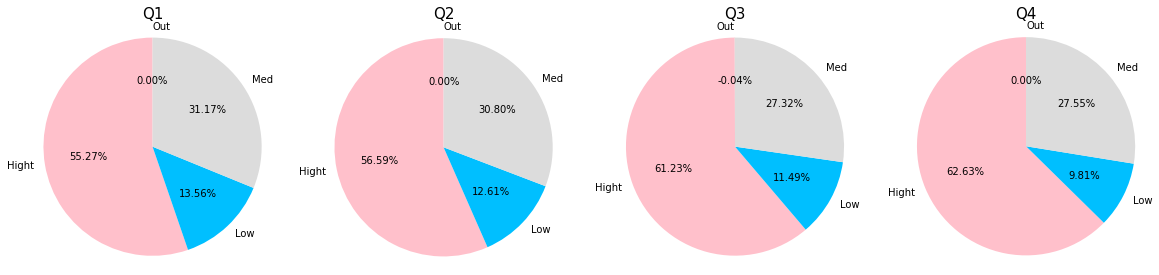

In [ ]:
e2015 = sales_data.groupby(['Tier' ,'Month'])['Sales2015'].sum()

Q1 = pd.DataFrame({'HIGH': [3.867719e+06],
                   'Low': [9.488328e+05],
                   'Med': [2.181402e+06],
                   'Out': [0.000000e+00]})

Q2 = pd.DataFrame({'HIGH': [4.030461e+06],
                   'Low': [8.979016e+05],
                   'Med': [2.193551e+06],
                   'Out': [0.000000e+00]})

Q3= pd.DataFrame({'HIGH': [1.535555e+06 +3.437496e+06],
                   'Low': [4.664163e+05 +4.664163e+05],
                   'Med': [1.648551e+06 +5.707698e+05],
                   'Out': [-3.248530e+03]})

Q4= pd.DataFrame({'HIGH': [4.740002e+06],
                   'Low': [7.426594e+05],
                   'Med': [2.085207e+06],
                   'Out': [0.000000e+00]})

new_index=['Hight','Low','Med','Out']
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 4, 1) 
plt.pie(Q1, labels = new_index, startangle = 90, counterclock = True, autopct = "%.2f%%", colors = ['pink','deepskyblue','gainsboro','whitesmoke']);
plt.title('Q1',fontsize=15)
plt.axis('square')


plt.subplot(1, 4, 2)
plt.pie(Q2, labels = new_index, startangle = 90, counterclock = True, autopct = "%.2f%%", colors = ['pink','deepskyblue','gainsboro','whitesmoke']);
plt.title('Q2',fontsize=15)
plt.axis('square')

plt.subplot(1, 4, 3) 
plt.pie(Q3, labels = new_index, startangle = 90, counterclock = True, autopct = "%.2f%%", colors = ['pink','deepskyblue','gainsboro','whitesmoke']);
plt.title('Q3',fontsize=15)
plt.axis('square')


plt.subplot(1, 4, 4)
plt.pie(Q4, labels = new_index, startangle = 90, counterclock = True, autopct = "%.2f%%", colors = ['pink','deepskyblue','gainsboro','whitesmoke']);
plt.title('Q4',fontsize=15)
plt.axis('square')